In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Attention
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup

In [2]:
data=pd.read_excel("Dataset.xlsx")

In [3]:
data.drop_duplicates(subset=['Text'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)   #dropping na

In [4]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [5]:
data['Text'][:10]

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def text_cleaner(text, num):
    # Check if the input is a string
    if not isinstance(text, str):
        text = str(text)
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"', '', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b", "", newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = re.sub('[m]{2,}', 'mm', newString)
    if num == 0:
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens = newString.split()
    long_words = []
    for i in tokens:
        if len(i) > 1:  # removing short word
            long_words.append(i)
    return (" ".join(long_words)).strip()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91764\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0))

C:\Users\91764\AppData\Local\Temp\ipykernel_10544\2657129116.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


In [8]:
cleaned_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [9]:
data['Summary'][:10]

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

In [10]:
#call the function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

C:\Users\91764\AppData\Local\Temp\ipykernel_10544\2657129116.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text
C:\Users\91764\AppData\Local\Temp\ipykernel_10544\2657129116.py:12: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


In [11]:
cleaned_summary[:10]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great just as good as the expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

In [12]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

In [13]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

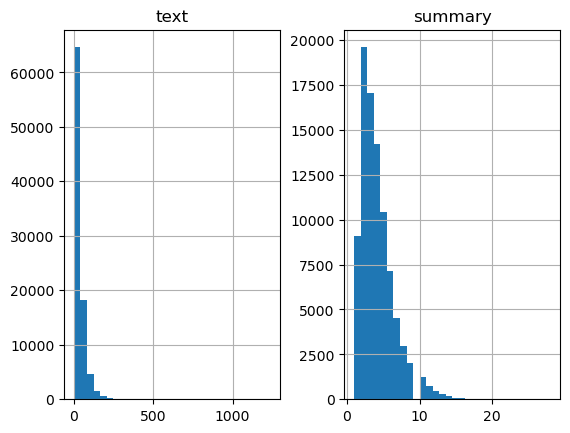

In [14]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [15]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=8):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.9423989182479163


In [16]:
max_text_len=30
max_summary_len=8

In [17]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [18]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [19]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [21]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.16338207247298
Total Coverage of rare words: 2.91276650736617


In [22]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [23]:
x_voc

8517

In [24]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [25]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 78.1871535702641
Total Coverage of rare words: 5.333526465721196


In [26]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [27]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(43484, 43484)

In [28]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [29]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [30]:
from keras import backend as K
from tensorflow.keras.layers import Attention
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = Attention()
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 30, 100)              851700    ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 30, 300),            481200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                                                             

In [31]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [33]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=128, validation_data=
 ([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/10

332/332 [==============================] - 564s 2s/step - loss: 3.0097 - val_loss: 2.7430
Epoch 2/10
332/332 [==============================] - 539s 2s/step - loss: 2.6706 - val_loss: 2.6379
Epoch 3/10
332/332 [==============================] - 542s 2s/step - loss: 2.5577 - val_loss: 2.5147
Epoch 4/10
332/332 [==============================] - 429s 1s/step - loss: 2.4933 - val_loss: 2.4735
Epoch 5/10
332/332 [==============================] - 373s 1s/step - loss: 2.4450 - val_loss: 2.4200
Epoch 6/10
332/332 [==============================] - 419s 1s/step - loss: 2.4002 - val_loss: 2.3800
Epoch 7/10
332/332 [==============================] - 434s 1s/step - loss: 2.3579 - val_loss: 2.4331
Epoch 8/10
332/332 [==============================] - 420s 1s/step - loss: 2.3162 - val_loss: 2.3146
Epoch 9/10
332/332 [==============================] - 455s 1s/step - loss: 2.2730 - val_loss: 2.2871
Epoch 10/10
332/332 [==============================] - 398s 1s/step - loss: 2.2333 - val_l

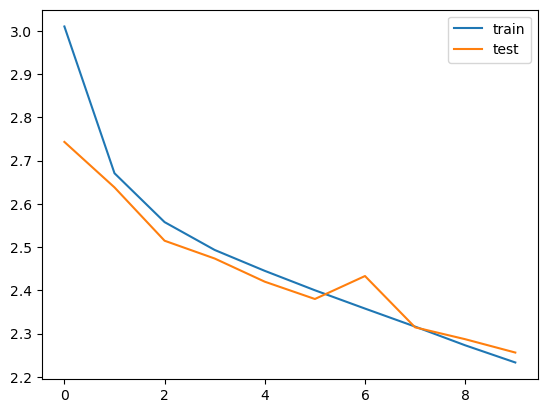

In [34]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [35]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [36]:
# Define inference models
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# Attention inference
# attn_out_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1)([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [37]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        print(f"Target Sequence shape {target_seq}")
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token
        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence    

In [38]:
# functions to convert an integer sequence to a word sequence for summary as well as the reviews:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [39]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: quality product served warm thick whisky cream get better pie purchased pack quickly would necessary alas sold wait become available worth wait highly recommend 
Original summary: quality 
1/1 [==============================] - 1s 865ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 283ms/step
Target Sequence shape [[3.]]
1/1 [==============================] - 0s 28ms/step
Target Sequence shape [[15.]]
1/1 [==============================] - 0s 23ms/step
Predicted summary:  great product


Review: pop chips best chips low calorie originals favorite sea salt vinegar good also 
Original summary: great chips 
1/1 [==============================] - 0s 54ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 30ms/step
Target Sequence shape [[16.]]
1/1 [==============================] - 0s 32ms/step
Predicted summary:  delicious


Review: run miles every weekend tell difference use product take 
Original summary: it works 
1/1 [====

1/1 [==============================] - 0s 54ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 26ms/step
Target Sequence shape [[13.]]
1/1 [==============================] - 0s 31ms/step
Target Sequence shape [[26.]]
1/1 [==============================] - 0s 31ms/step
Target Sequence shape [[38.]]
1/1 [==============================] - 0s 26ms/step
Target Sequence shape [[12.]]
1/1 [==============================] - 0s 27ms/step
Predicted summary:  my dog loves it


Review: received selection cups familiar green mountain thought would try something new good made ounce cup well flavored nice deep bitter would definitely buy one 
Original summary: nice strong cup not bitter 
1/1 [==============================] - 0s 62ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 24ms/step
Target Sequence shape [[3.]]
1/1 [==============================] - 0s 26ms/step
Target Sequence shape [[10.]]
1/1 [==============================] - 0s 26ms

1/1 [==============================] - 0s 57ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 31ms/step
Target Sequence shape [[3.]]
1/1 [==============================] - 0s 31ms/step
Target Sequence shape [[15.]]
1/1 [==============================] - 0s 44ms/step
Predicted summary:  great product


Review: second ingredient sugar need say make bisquit mix super easy 
Original summary: sugar sugar sugar 
1/1 [==============================] - 0s 53ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 26ms/step
Target Sequence shape [[3.]]
1/1 [==============================] - 0s 23ms/step
Target Sequence shape [[15.]]
1/1 [==============================] - 0s 23ms/step
Predicted summary:  great product


Review: repeat customer pamela amazing bread mix truly amazing son loves moist wonderful taste give high 
Original summary: its amazing because it is amazing 
1/1 [==============================] - 0s 49ms/step
Target Sequence sh

1/1 [==============================] - 0s 62ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 33ms/step
Target Sequence shape [[13.]]
1/1 [==============================] - 0s 31ms/step
Target Sequence shape [[26.]]
1/1 [==============================] - 0s 27ms/step
Target Sequence shape [[38.]]
1/1 [==============================] - 0s 34ms/step
Target Sequence shape [[12.]]
1/1 [==============================] - 0s 27ms/step
Predicted summary:  my dog loves it


Review: cats love eat cat foods used switching new foods tricky problem loved food even cat never eats canned food dug food tasty looking great aroma good stuff 
Original summary: great assortment aroma cats love it 
1/1 [==============================] - 0s 50ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 28ms/step
Target Sequence shape [[13.]]
1/1 [==============================] - 0s 34ms/step
Target Sequence shape [[103.]]
1/1 [==============================] -

1/1 [==============================] - 0s 51ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 34ms/step
Target Sequence shape [[3.]]
1/1 [==============================] - 0s 28ms/step
Target Sequence shape [[15.]]
1/1 [==============================] - 0s 30ms/step
Predicted summary:  great product


Review: love coffee used folgers coffee many years one black silk best yet 
Original summary: this coffee 
1/1 [==============================] - 0s 59ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 47ms/step
Target Sequence shape [[9.]]
1/1 [==============================] - 0s 29ms/step
Target Sequence shape [[12.]]
1/1 [==============================] - 0s 27ms/step
Predicted summary:  love it


Review: favorite bars sweet natural order bulk every time cranberries give bit tangy flavor makes right almonds taste fresh crunchy highly recommend 
Original summary: great bars 
1/1 [==============================] - 0s 59ms/step
Tar

1/1 [==============================] - 0s 30ms/step
Predicted summary:  great product


Review: love variety tastes textures earth best offers gourmet meals selection fabulous son devoured everything smile suggest getting subscribe save child big eater like mine always earth best best 
Original summary: love the variety of tastes 
1/1 [==============================] - 0s 54ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 24ms/step
Target Sequence shape [[16.]]
1/1 [==============================] - 0s 26ms/step
Predicted summary:  delicious


Review: wonderful packed cranberries taste great mixed maple nut great busy morning time breakfast run tie till lunch know gave something good 
Original summary: wonderful 
1/1 [==============================] - 0s 53ms/step
Target Sequence shape [[1.]]
1/1 [==============================] - 0s 31ms/step
Target Sequence shape [[16.]]
1/1 [==============================] - 0s 27ms/step
Predicted summary:  delicious


